In [1]:
import networkx as nx
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

DATA_PATH = "data/"

# Create network
- Load dataframe with shelves
- Implode dataframe to make shelves into edgelist
- Calculate assortativity
    - Genre
    - Degrees
- Get largest sub network
- Create communities
    - Color according to genre

In [2]:
# load data 
shelves_df = pd.read_csv(DATA_PATH + 'shelves_df.csv')

In [3]:

imploded_df = shelves_df.groupby('user_id')['book_id'].apply(list).reset_index()
#imploded_df

In [13]:
len(imploded_df)

818618

In [82]:
imploded_df["book_id"]

0         [947, 944, 941, 940, 939, 938, 936, 935, 933, ...
1         [1065, 1063, 1061, 1058, 1051, 1052, 1050, 104...
2         [613, 898, 862, 858, 968, 938, 941, 939, 1009,...
3         [1496, 1495, 1494, 1490, 1196, 1488, 1004, 148...
4         [1633, 1632, 996, 1386, 1387, 1626, 1622, 1494...
                                ...                        
818613    [2407, 14707, 13114, 19962, 14731, 63229, 1596...
818614    [8449, 1049, 14854, 6144, 17044, 453, 1473, 16...
818615    [739, 1203, 545, 15474, 810, 1007, 1065, 1013,...
818616    [1572, 1002, 1473, 16140, 619, 1605, 1402, 147...
818617                                        [1434, 85946]
Name: book_id, Length: 818618, dtype: object

In [4]:
# Create dictionary edges and appearances 
edges = {}

# Go through shelves to get edges
for i, shelf in tqdm(imploded_df.iterrows(), total=imploded_df.shape[0]):
    if len(shelf['book_id']) > 1:
        # Generate pairs of books 
        for i in range(len(shelf['book_id'])):
            for j in range(i+1, len(shelf['book_id'])):
                # Create edge
                edge = frozenset([shelf['book_id'][i], shelf['book_id'][j]])
                # Add edge to dictionary
                if edge in edges:
                    edges[edge] += 1
                else:
                    edges[edge] = 1

len(edges)

100%|██████████| 818618/818618 [10:52:34<00:00, 20.91it/s]    


28947784

In [5]:
import pickle
with open(DATA_PATH + 'edges.pickle', 'wb') as f:
    # use pickle.dump to serialize the dictionary and save it to the file
    pickle.dump(edges, f)

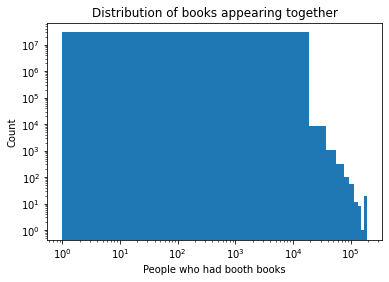

In [7]:
# Plot a histogram of the number of times each edge appears
plt.hist(edges.values())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('People who had booth books')
plt.ylabel('Count')
plt.title('Distribution of books appearing together')
plt.show()

In [12]:
sum(np.array(edges.values()) > 1000)

TypeError: '>' not supported between instances of 'dict_values' and 'int'

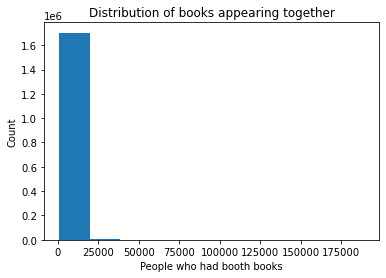

In [14]:
plt.hist(np.array(list(edges.values()))[np.array(list(edges.values())) > 1000])
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('People who had booth books')
plt.ylabel('Count')
plt.title('Distribution of books appearing together')
plt.show()


In [15]:
print(len(edges), len(edges)/7917)

28947784 3656.4082354427183


In [10]:
H = nx.compose_all(map(nx.complete_graph, imploded_df["book_id"]))
print(H.nodes, H.edges)
print(H)

KeyboardInterrupt: 